<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [860]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import pandas as pd
import pandas_express
import numpy as np
import spacy
from spacy.tokenizer import Tokenizer
import squarify

In [781]:
nlp = spacy.load("en_core_web_lg")

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read thru the documentation to accomplish this task. 

`Tip:` You will need to install the `bs4` library inside your conda environment. 

In [874]:
jobs = pd.read_csv('./data/job_listings.csv')[['description', 'title']]

In [875]:
print(jobs.shape)
jobs.head()

(426, 2)


,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [876]:
descriptions = jobs['description']
descriptions.head()

0    b"<div><div>Job Requirements:</div><ul><li><p>...
1    b'<div>Job Description<br/>\n<br/>\n<p>As a Da...
2    b'<div><p>As a Data Scientist you will be work...
3    b'<div class="jobsearch-JobMetadataHeader icl-...
4    b'<ul><li>Location: USA \xe2\x80\x93 multiple ...
Name: description, dtype: object

In [877]:
def clean(data):
    remove_chars = {
        r'\\xe2\\x80\\x99': "'",
        r'\\xe2\\x80\\x93': "-",
        r'\\xe2\\x80\\x94': "-",
        r'\\xe2\\x80\\x9c': '"',
        r'\\xe2\\x80\\xa6': " ",
        r'\\xc2\\xae': " ",
        r'\\xe2\\x84\\xa2': " ",
        r'\\xc2\\xbb': " ",
        r'\\xc2\\xb7': " ",
        r'\\xe2\\x80\\xa0': " ",
        r'\\xe2\\x80\\x8b': " ",
        r'\\xc2\\xa8': " ",
        r'\\xe2\\x82\\xac': " ",
        r'\\xef\\xac\\x81': " ",
        r'\\xe2\\x84\\xa0': " ",
        r'\\xef\\xbb\\xbf': " ",
        r'\\xe2\\x80\\x9d': '"',
        r'\\xef\\x83\\x98': " ",
        r'\\xe2\\x80\\x98': "'",
        r'\\xe2\\x80\\xa2': " ",
        r'\\xef\\x82\\xa7': " ",
        r'\\xc3\\xa9': "e",
        r'\\xe2\\x80\\x90': "-",
        r'\\xe2\\x9c\\xa6': " ",
        r'\\xe2\\x9c\\xa7': " ",
        r'\\xc3\\xaf': "i",
        r'\\xc2\\xa9': " ",
        r'\\n': " ",
        r'(?<=\d),(?=\d)': "",
        r'<.*?>': " ",
        r"'$": "",
        r"\\'": "'",
        r"needs\\\\possess": "needs. possess"
    }
    
    urls = {
        r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})': ""
    }
    
    selectors = "\#li[a-z0-9\-_]*"
    
    tags = r"(?:(?<=\s)|(?<=^))(li|jl|mv|mon|sfarm|pm|id|req)(?=\s|$)"
    
    data = data.str.lower().str[2:]
    
    data = data.replace(urls, regex=True)
    data = data.replace(remove_chars, regex=True)
    data = data.replace({tags: ""}, regex=True)
    data = data.replace({selectors: ""}, regex=True)
    data = data.replace({r"\s{2,}": " "}, regex=True)
    
    data = data.str.strip()
    
    return data

In [878]:
jobs['description'] = clean(descriptions)
jobs = jobs.drop_duplicates()
descriptions = jobs['description']

## 2) Use Spacy to tokenize the listings 

In [879]:
##### Your Code Here #####
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON') and (token.pos_ != 'NUM'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [880]:
tokens = descriptions.apply(get_lemmas)

In [881]:
words = set()
for _, row in tokens.iteritems():
    words.update(row)
    
len(words)

6353

In [882]:
tokens_str = tokens.str.join(' ')

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [883]:
vect = CountVectorizer()

vect.fit(tokens_str)

dtm = vect.transform(tokens_str)

In [884]:
dtm.shape

(355, 6212)

In [885]:
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
print(dtm.shape)
dtm.head()

(355, 6212)


,10,100x,10b,10ms,10x,112,12,14000,17b,180008jq,...,zenreach,zeus,zf,zheng,zillow,zogsport,zone,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [886]:
counts = dtm.sum().sort_values(ascending=False)

In [887]:
counts_pct = counts / sum(counts.values)

20


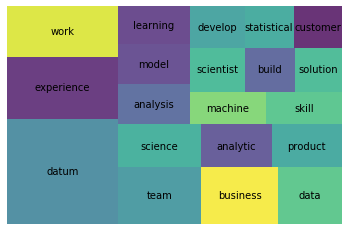

In [888]:
counts_20 = counts[:20]
counts_pct_20 = counts_pct[:20]
print(len(counts_20))

squarify.plot(sizes=counts_pct_20, label=counts_20.index, alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [889]:
tfidf = TfidfVectorizer()

dtm = tfidf.fit_transform(tokens_str)

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,10,100x,10b,10ms,10x,112,12,14000,17b,180008jq,...,zenreach,zeus,zf,zheng,zillow,zogsport,zone,zoom,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.112281,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [890]:
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [891]:
ideal = ["Self driving cars"]
ideal_trans = tfidf.transform(ideal)

In [898]:
neighbors = nn.kneighbors(ideal_trans.todense())
neighbors

(array([[1.21060207, 1.35332179, 1.3684849 , 1.38315031, 1.38425018]]),
 array([[270,  18,  83, 305,  69]]))

In [899]:
jobs.iloc[neighbors[1][0]]['description'].values

array(['nauto is an ai technology company that\'s improving the safety of commercial fleets today and the autonomous fleets of tomorrow. nauto\'s intelligent driver safety system assesses how drivers interact with the vehicle and the road ahead to reduce distracted driving and prevent collisions. with this knowledge, nauto is powering the development of self-driving technology that brings the best of human driving to autonomy. are you ready to help with this mission? we\'re aiming for greater safety and knowledge: our approach to re-thinking road safety is two-fold: deepen our understanding of real-world drivers to learn how they interact with the vehicle and road, with the goal of reducing distracted driving and preventing collisions before they occur. second, apply these insights to the development of safe, effective autonomous vehicles that fit into existing traffic patterns and human driving behavior. we\'re taking a driver-centric approach: we surface the safety insights that matt

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 